In [ ]:
#forked from https://github.com/prateekjoshi565/DeepWalk

In [3]:
import networkx as nx
import pandas as pd
import numpy as np
import random
from tqdm import tqdm
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
%matplotlib inline

You can get the dataset from https://densitydesign.github.io/strumentalia-seealsology/

a) Enter the following links:
https://en.wikipedia.org/wiki/project_management

https://en.wikipedia.org/wiki/contract

https://en.wikipedia.org/wiki/NEC_Engineering_and_Construction_Contract

b) Download the TSV file.

In [4]:
df = pd.read_csv("2020_02_constructioncontractWIkipedia.tsv", sep = "\t")

In [42]:
df.head(10)

,source,target,depth
0,contract,arbitration clause,1
1,contract,bill of sale,1
2,contract,conflict of contract laws,1
3,contract,contract awarding,1
4,contract,contract farming,1
5,contract,contract management,1
6,contract,contract of sale,1
7,contract,contract theory,1
8,contract,wikt:contracting,1
9,contract,design by contract,1


In [6]:
df.shape

(754, 3)

In [7]:
# construct an undirected graph
G=nx.from_pandas_edgelist(df, "source", "target", edge_attr=True, create_using=nx.Graph())

In [8]:
len(G) # number of nodes

662

In [9]:
# function to generate random walk sequences of nodes
def get_randomwalk(node, path_length):
    
    random_walk = [node]
    
    for i in range(path_length-1):
        temp = list(G.neighbors(node))
        temp = list(set(temp) - set(random_walk))    
        if len(temp) == 0:
            break

        random_node = random.choice(temp)
        random_walk.append(random_node)
        node = random_node
        
    return random_walk

In [43]:
get_randomwalk('contract', 10)

['contract',
 'contract management',
 'document automation',
 'template processor']

In [44]:
all_nodes = list(G.nodes())

random_walks = []

for n in tqdm(all_nodes):
    for i in range(5):
        random_walks.append(get_randomwalk(n,10))

100%|██████████| 662/662 [00:00<00:00, 9107.79it/s]


In [12]:
# count of sequences
len(random_walks)

3310

In [13]:
from gensim.models import Word2Vec

import warnings
warnings.filterwarnings('ignore')

In [14]:
# train word2vec model
model = Word2Vec(window = 4, sg = 1, hs = 0,
                 negative = 10, # for negative sampling
                 alpha=0.03, min_alpha=0.0007,
                 seed = 14)

model.build_vocab(random_walks, progress_per=2)

In [15]:
model.train(random_walks, total_examples = model.corpus_count, epochs=20, report_delay=1)

(178574, 225720)

In [16]:
print(model)

Word2Vec(vocab=662, size=100, alpha=0.03)


In [23]:
# find top n similar nodes
model.similar_by_word('contract')

[('electronic signature', 0.9342597126960754),
 ('wikt:contracting', 0.9094598293304443),
 ('ethical implications in contracts', 0.9038865566253662),
 ('conflict of contract laws', 0.9002953767776489),
 ('further assurances', 0.8965739011764526),
 ('implicit contract theory', 0.8948668837547302),
 ('alienation of affections', 0.8904479146003723),
 ('stipulation', 0.8891881704330444),
 ('law of obligations (bulgaria)', 0.8866288661956787),
 ('unenforceable', 0.8800835609436035)]

In [29]:
terms = ['stipulation','unenforceable', 'contract', 'bill of sale', 'contract awarding','arbitration clause']

In [30]:
def plot_nodes(word_list):
    X = model[word_list]
    
    # reduce dimensions to 2
    pca = PCA(n_components=2)
    result = pca.fit_transform(X)
    
    
    plt.figure(figsize=(12,9))
    # create a scatter plot of the projection
    plt.scatter(result[:, 0], result[:, 1])
    for i, word in enumerate(word_list):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]))
        
    plt.show()

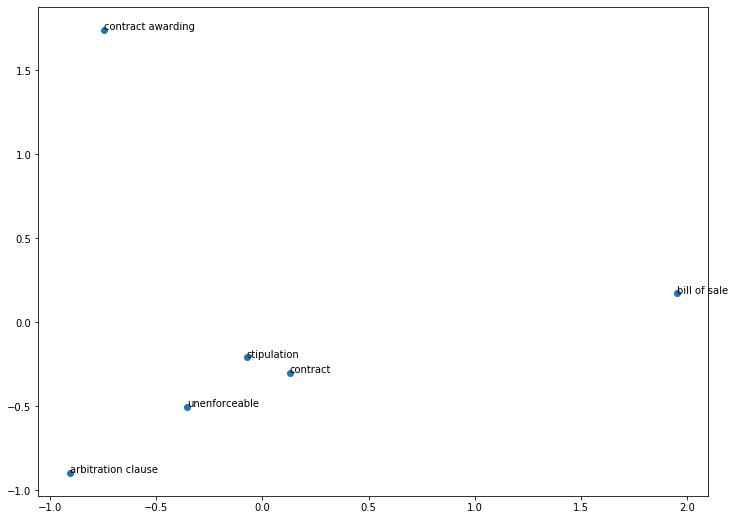

In [31]:
plot_nodes(terms)

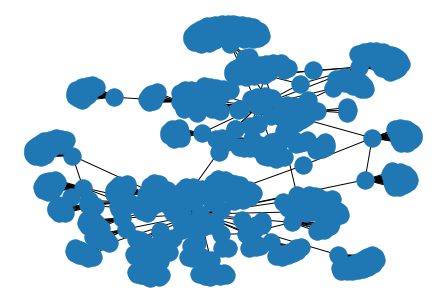

In [39]:
nx.draw(G, with_labels=False)

In [37]:
G1=nx.ego_graph(G, n='contract', radius=1, center=True, undirected=False, distance=None)

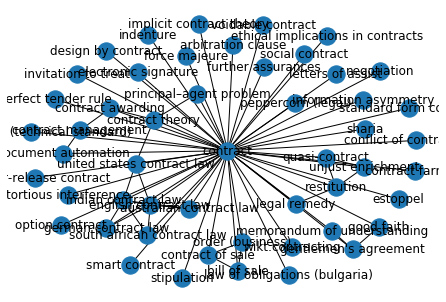

In [40]:
nx.draw(G1, with_labels=True)